            passengers_thousands
Month                           
1949-01-01                 112.0
1949-02-01                 118.0
1949-03-01                 132.0
1949-04-01                 129.0
1949-05-01                 121.0


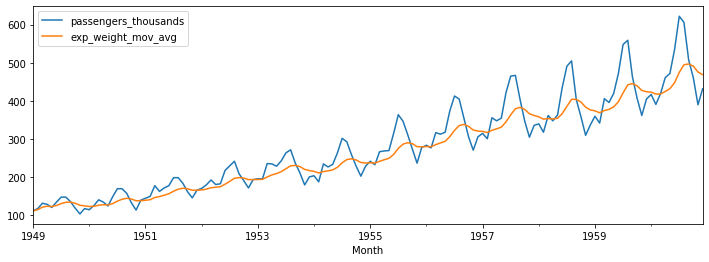

In [58]:
# time series dataset of airline passenger travel from https://www.kaggle.com/andreazzini/international-airline-passengers

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels as sm
from pylab import rcParams

# setting a default figure size for timeseries plots

rcParams['figure.figsize'] = 12,4

# importing and cleaning the data

df = pd.read_csv('international-airline-passengers.csv')

df.rename(columns = {'International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60': 'passengers_thousands'}, inplace = True)
df.dropna(inplace = True)
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace = True)

# setting the sampling frequency to months, for the Holt-Winters model
df.index.freq = 'MS'

print(df.head())

df['exp_weight_mov_avg'] = df['passengers_thousands'].ewm(span = 12).mean()

df.plot()

Text(0, 0.5, 'Passengers (1000s)')

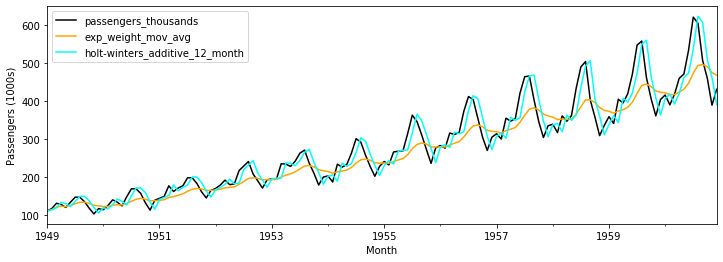

In [62]:
# fitting an additive Holt-Winters triple exponential smoothing model using statsmodels

holtwinters = sm.tsa.holtwinters

hw_mod_add = holtwinters.ExponentialSmoothing(df['passengers_thousands'], trend = 'additive')


hw_mod_add = hw_mod_add.fit(optimized = True)

df['holt-winters_additive_12_month'] = hw_mod_add.fittedvalues

ax = df.plot(color = ['black', 'orange', 'cyan'])
ax.set_ylabel('Passengers (1000s)')

Text(0, 0.5, 'Passengers (1000s)')

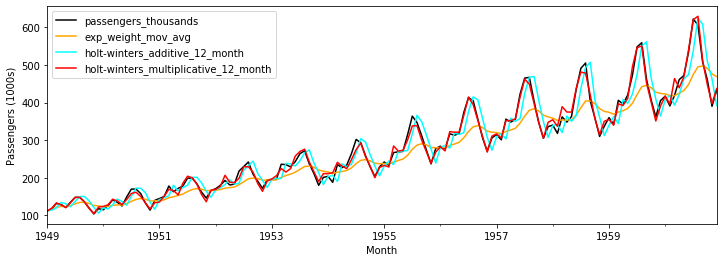

In [63]:
# fitting an multiplicative Holt-Winters model using statsmodels



hw_mod_mul = holtwinters.ExponentialSmoothing(df['passengers_thousands'], 
                                              trend = 'multiplicative', 
                                              seasonal = 'multiplicative',
                                             seasonal_periods = 12)

hw_mod_mul = hw_mod_mul.fit(optimized = True)

df['holt-winters_multiplicative_12_month'] = hw_mod_mul.fittedvalues

ax = df.plot(color = ['black', 'orange','cyan', 'red'])
ax.set_ylabel('Passengers (1000s)')

Text(0, 0.5, 'Passengers (1000s)')

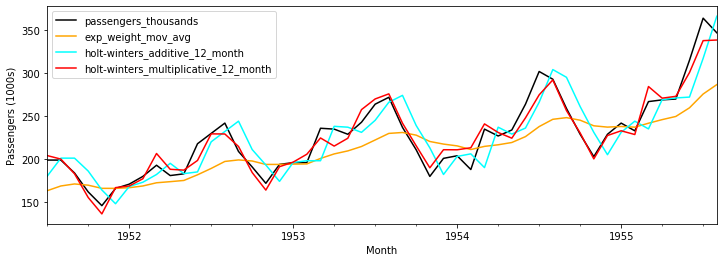

In [66]:
ax = df.iloc[30:80].plot(color = ['black', 'orange','cyan', 'red'])
ax.set_ylabel('Passengers (1000s)')